Edureka:

https://www.edureka.co/ai-deep-learning-with-tensorflow

Deep inside Autoencoders: https://towardsdatascience.com/deep-inside-autoencoders-7e41f319999f

In [1]:
import numpy as np

In [2]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.activations import relu, sigmoid
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError

from tensorflow.keras.datasets import cifar10

In [3]:
import matplotlib.pyplot as plt

The autoencoder

In [4]:
convolutional_autoencoder = Sequential([
        Input(shape=(32, 32, 3)),
        # Encoder
        Conv2D(16, (3, 3), activation=relu, padding='same'),
        MaxPooling2D((2, 2), padding='same'),
        Conv2D(8, (3, 3), activation=relu, padding='same'),
        MaxPooling2D((2, 2), padding='same'),
        Conv2D(8, (3, 3), activation=relu, padding='same'),
        MaxPooling2D((2, 2), padding='same'),
        # Decoder
        Conv2D(8, (3, 3), activation=relu, padding='same'),
        UpSampling2D((2, 2)),
        Conv2D(8, (3, 3), activation=relu, padding='same'),
        UpSampling2D((2, 2)),
        Conv2D(16, (3, 3), activation=relu, padding='same'),
        UpSampling2D((2, 2)),
        Conv2D(3, (3, 3), activation=sigmoid, padding='same')
    ])

Configure our model to use a per-pixel binary crossentropy loss

In [5]:
convolutional_autoencoder.compile(optimizer=Adam(), loss=MeanSquaredError())

Prepare our input data. We're using CIFAR images and we're discarding the labels

In [6]:
(x_train, _), (x_test, _) = cifar10.load_data()

Normalize all values between 0 and 1 and we will flatten the 28x28 imagesinto vectors of size 784

In [7]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [8]:
print(x_train.shape)

(50000, 32, 32, 3)


In [9]:
print(x_test.shape)

(10000, 32, 32, 3)


Train autoencoder for 50 epochs

In [10]:
convolutional_autoencoder.fit(x_train, x_train,
               epochs=50,
               batch_size=256,
               shuffle=True,
               validation_data=(x_test,x_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 42s 835us/sample - loss: 0.0329 - val_loss: 0.0239
Epoch 2/50
50000/50000 [==============================] - 43s 850us/sample - loss: 0.0219 - val_loss: 0.0204
Epoch 3/50
50000/50000 [==============================] - 42s 848us/sample - loss: 0.0193 - val_loss: 0.0179
Epoch 4/50
50000/50000 [==============================] - 43s 864us/sample - loss: 0.0173 - val_loss: 0.0167
Epoch 5/50
50000/50000 [==============================] - 58s 1ms/sample - loss: 0.0163 - val_loss: 0.0162
Epoch 6/50
50000/50000 [==============================] - 67s 1ms/sample - loss: 0.0157 - val_loss: 0.0156
Epoch 7/50
50000/50000 [==============================] - 50s 1ms/sample - loss: 0.0153 - val_loss: 0.0154
Epoch 8/50
50000/50000 [==============================] - 45s 908us/sample - loss: 0.0150 - val_loss: 0.0148
Epoch 9/50
50000/50000 [==============================] - 52s 1ms/sample - loss: 0.0

Encode and decode some images.

Note that we take them from the *test* set

In [12]:
decoded_imgs = convolutional_autoencoder.predict(x_test)

Visualize the reconstructed inputs and the encoded representation.

In [13]:
n = 20 # how many images we will display

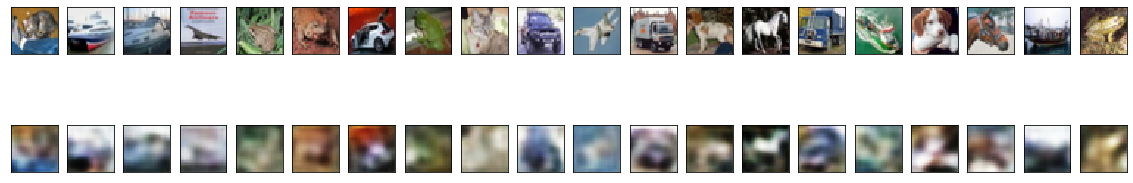

In [14]:
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(32, 32, 3))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()